# Hailey Weinschenk TJX Data Analyst Assignment - July 2023

This Notebook is my submission to the Data Analyst Assignment for TJX Companies. The dataset will be cleaned and exploratory data analysis will be performed. This includes finding and purging duplicates, accounting for missing field values, and label manipulation. Then, more in depth analysis will be performed in order to provide markdown policy recommendations.

The first step is to import the dataset. This is done using pandas, specifically the `read_excel` function. The data is from the second sheet of the Excel file named `Data`.

In [1]:
import pandas as pd

df = pd.read_excel('DataAnalystQuestion.xlsx',sheet_name = "Data")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


View the first view entries to ensure proper importation and to gain a sense of the fields:

In [2]:
df.head()

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,Casual Wear,Denim,24,64,64,0,1327.62,1327.62,0.0,5,5,0,114.95,114.95,0.0
1,Casual Wear,Denim,24X28,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,Casual Wear,Denim,24x30,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
3,Casual Wear,Denim,25,68,68,0,1495.58,1495.58,0.0,1,1,0,18.99,18.99,0.0
4,Casual Wear,Denim,25x28,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0


The data appears to be imported correctly. It involves both standard and discount sales for various departments and clothes types. This is useful to reveal effectiveness of sales to perhaps shine light on systematic problems preventing profit within one Department or clothes type.

In [3]:
# view data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Department                  1746 non-null   object 
 1   Class                       1746 non-null   object 
 2   Size                        1688 non-null   object 
 3   Inventory Units             1746 non-null   int64  
 4   Full Price Inventory Units  1746 non-null   int64  
 5   Markdown Inventory Units    1746 non-null   int64  
 6   Inventory Value             1746 non-null   float64
 7   Full Price Inventory Value  1746 non-null   float64
 8   Markdown Inventory Value    1746 non-null   float64
 9   Units Sold                  1746 non-null   int64  
 10  Full Price Units Sold       1746 non-null   int64  
 11  Markdown Units Sold         1746 non-null   int64  
 12  Sales                       1746 non-null   float64
 13  Full Price Sales            1746 

There are seemingly 3 object (string) columns: `Department`, `Class`, and `Size`. Even though `Size` can be numeric, it represents a categorical variable. For this reason, its string classification is correct.

In [4]:
df.select_dtypes(include = 'object').head()

,Department,Class,Size
0,Casual Wear,Denim,24
1,Casual Wear,Denim,24X28
2,Casual Wear,Denim,24x30
3,Casual Wear,Denim,25
4,Casual Wear,Denim,25x28


# Missing Field Values

Firstly, null values will be searched for and handled.

In [5]:
nulls = df.isnull().sum() # columnwise sum
print(nulls)
null_col = nulls[nulls.values != 0].index[0]
print(f'There are {nulls.sum()} missing entries in the dataset appearing in the column(s) `{null_col}`.')

Department                     0
Class                          0
Size                          58
Inventory Units                0
Full Price Inventory Units     0
Markdown Inventory Units       0
Inventory Value                0
Full Price Inventory Value     0
Markdown Inventory Value       0
Units Sold                     0
Full Price Units Sold          0
Markdown Units Sold            0
Sales                          0
Full Price Sales               0
Markdown Sales                 0
dtype: int64
There are 58 missing entries in the dataset appearing in the column(s) `Size`.


Now, we can view the missing entries in the column that they appear.

In [6]:
df[df[null_col].isnull()].head(10)

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
547,Handbags/Accessories,Backpack,NaN,1091,1022,69,47781.04,44545.28,3235.76,0,0,0,0.0,0.0,0.0
554,Handbags/Accessories,Evening/Clutch,NaN,2004,1431,573,73085.49,60043.14,13042.35,0,0,0,0.0,0.0,0.0
555,Handbags/Accessories,Hobos,NaN,2027,1866,161,107773.09,87291.09,20482.00,0,0,0,0.0,0.0,0.0
556,Handbags/Accessories,Italy,NaN,58,58,0,6509.43,6509.43,0.00,0,0,0,0.0,0.0,0.0
557,Handbags/Accessories,Luxury,NaN,5,5,0,2999.95,2999.95,0.00,0,0,0,0.0,0.0,0.0
569,Handbags/Accessories,Messenger/Xbody,NaN,5358,4843,515,235683.83,219197.23,16486.60,0,0,0,0.0,0.0,0.0
570,Handbags/Accessories,Satchels,NaN,7737,6368,1369,306853.17,268935.57,37917.60,0,0,0,0.0,0.0,0.0
571,Handbags/Accessories,SLG,NaN,3810,2648,1162,70851.52,55903.52,14948.00,0,0,0,0.0,0.0,0.0
572,Handbags/Accessories,Totes,NaN,5445,4430,1015,210485.21,188231.96,22253.25,0,0,0,0.0,0.0,0.0
1097,Men & Womens Athle,Walking,NaN,122,0,122,3897.60,0.00,3897.60,0,0,0,0.0,0.0,0.0


In [7]:
print(df[df[null_col].isnull()]['Size'].values[1],type(df[df[null_col].isnull()]['Size'].values[1]))

nan <class 'float'>


It is clear that these NaN values correspond to non-clothing items. Moreover, they are float type missplaced in a string field. To avoid confusion, this will be changed to a similar, non-NaN field value. 

In [8]:
import numpy as np
df['Size'] = df['Size'].replace({np.nan:'Not-Clothing'})

In [9]:
df['Size'].tail()

1741    Not-Clothing
1742    Not-Clothing
1743    Not-Clothing
1744    Not-Clothing
1745    Not-Clothing
Name: Size, dtype: object

However, still with this modification, another problem emerges:

In [10]:
df.select_dtypes(include = 'object').all()

Department     True
Class          True
Size          False
dtype: bool

The datatypes of the Size column are mixed, probably int and string types. Perhaps pandas has incorrect attributed some of the solely numerical entries as `ints` even though they still are categorical. There are to be all reassigned to the string type.

In [11]:
# reassign using lambda fnctn declare to string type
df['Size'] = df['Size'].apply(lambda x: str(x))

In [12]:
df.select_dtypes(include = 'object').all()

Department    True
Class         True
Size          True
dtype: bool

The rest of the 11 columns are numeric, evenly split with `int` (integers) and `float` (decimals). The floats were properly used to house dollar amounts, while the ints are fitting to house figures for the amounts of units. This can be viewed below: 

In [13]:
df.select_dtypes(include = ['int64','float64']).head()

,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,64,64,0,1327.62,1327.62,0.0,5,5,0,114.95,114.95,0.0
1,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
3,68,68,0,1495.58,1495.58,0.0,1,1,0,18.99,18.99,0.0
4,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0


Thus, there is no further modification needed to the datatypes at this point.

By observation it can be observed that the numeric columns represent the following:
- Inventory Units: total units composed of
    - Full Price Inventory Units: units sold at full price
    - Markdown Inventory Units: units sold at discound
- Inventory Value: total unit worth
    - Full Price Inventory Value: total full price unit worth
    - Markdown Inventory Value: total discount unit worth
- Units Sold: total units sold
    - Full Price Units Sold
    - Markdown Units Sold
- Sales: total sales in dollar amounts broken into
    - Full price sales
    - Markdown sales

This can necessitate 4 assertions:

In [14]:
try:
    assert (df['Inventory Units'] == (df['Markdown Inventory Units'] + df['Full Price Inventory Units']) ).all(),'Unit Assertion'
    assert (df['Units Sold'] == (df['Full Price Units Sold'] + df['Markdown Units Sold']) ).all(),'Units Sold Assertion'
    assert (df['Sales'] == (df['Full Price Sales'] + df['Markdown Sales']) ).all(),'Sales Assertion'
    assert (df['Inventory Value'] == (df['Markdown Inventory Value'] + df['Full Price Inventory Value']) ).all(),'Value Assertion'
except AssertionError as e:
    print(f'The {e.args[0]} has failed.')
    pass

The Sales Assertion has failed.


There exists a flaw in the data set in which total sales is not equal to the sum of the markdown and non-markdown sales. This should be investigated further. For the purposes of this assignment, it can be deemed as negligible for the reason seen below:

In [15]:
print(f"The sales sums were equivalent for \
{round((df['Sales'] == df['Full Price Sales'] + df['Markdown Sales']).sum()/len(df['Sales'])*100,2)}% of entries")

The sales sums were equivalent for 94.96% of entries


So the vast majority of figures pass this sanity check. Still, this should be investigated further as this should be an impossibility for all product types.

# Duplicates

Next, duplicated values need to be found and purged.

In [16]:
df.duplicated()

print(f'There are {df.duplicated().sum()} duplicate entries in the dataset.')

There are 0 duplicate entries in the dataset.


This bodes well - All entries are unique.

# Categorical Column Visualization

Next, the values of the 10 most occurrent values of the categorical columns are explored:

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(col_name, df):
    if df[col_name].dtypes == 'object':
        print(f'Categorical Column: {col_name}')
        print()

        # 10 highest values for readability
        print(df[col_name].value_counts()[:10])
        
        #sns count plot
        sns.set_theme(style="whitegrid")
        sns.countplot( data = df, y = col_name,order = df[col_name].value_counts().index[:10], color = 'crimson')
        plt.show()
        print()

Categorical Column: Department

Ladies Footwear             273
Men & Womens Athle          147
Contemporary                136
Best Brands Casual          107
Decorative Textiles         104
Mens Moderate Sportswear     97
Inf & Toddlers               88
Dresses/Ladies Suits         86
Activewear                   85
Women's Sizes                81
Name: Department, dtype: int64


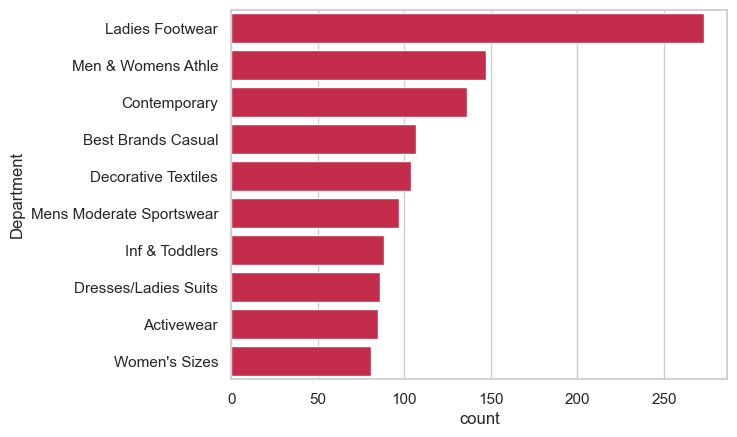


Categorical Column: Class

Denim             167
Pants             132
Shorts             99
Sandals            90
Sneakers           57
Skirts             53
Flats              40
Luxury             36
Womens Running     32
Jackets            31
Name: Class, dtype: int64


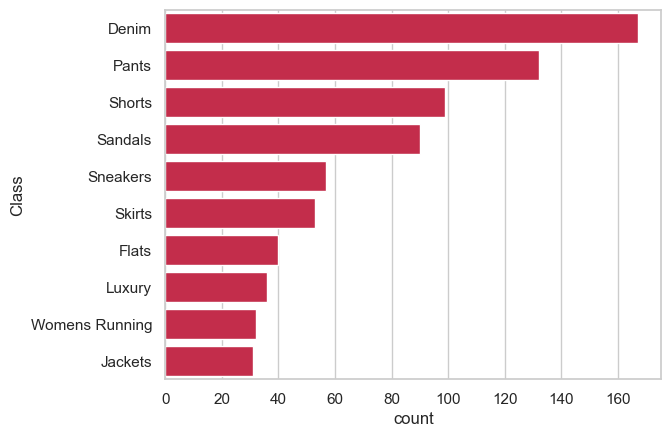


Categorical Column: Size

M               71
L               70
S               69
XL              59
Not-Clothing    58
XS              46
10              31
6               30
8               29
XXL             28
Name: Size, dtype: int64


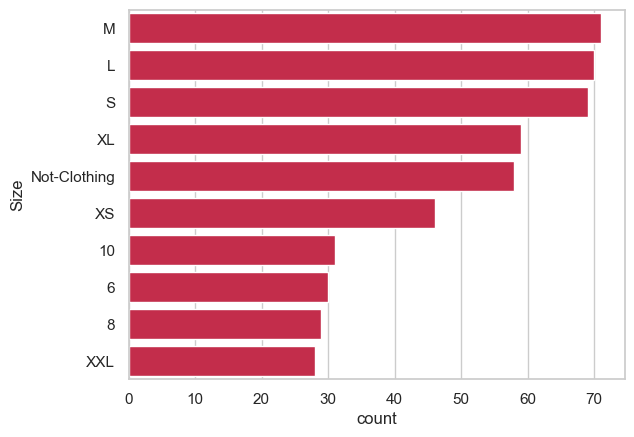

In [18]:
cat_cols = df.select_dtypes(include = 'object').head().columns
for cat in cat_cols:
    explore_categorical(cat,df)

There are a few things to be gathered from these visualizations. First and most important, is the sheer number of sales records for women's footwear relative to other departments. This is nearly doubled the next most prevelant department! For this reason, any promotional analysis or sales recors for this department should expect to have a disproportionate effect on the "big picture" of sales performance.

# Column `Size` Engineering

In [19]:
df['Size'].value_counts()

M               71
L               70
S               69
XL              59
Not-Clothing    58
                ..
10WW             1
10N              1
10.5WW           1
10.5 4E          1
25oz             1
Name: Size, Length: 433, dtype: int64

Even with the previously handled NaN values, there is still something that jumps out when viewing the `Size` column. Namely, this is the sheer amount of values appearing (nearly 440!). This won't enable conlcusions for this field without modification. 

As it stands, there are 433 representations of size in the merchandise, which is extremely high. In a similar way to the Null adjustment before, more entries can be funnelled into the Non Clothing category. While these might have sizings relevant to their type, they aren't compareable to conclusions drawn to clothing size analysis (i.e. King or Queen bedding sizes or Small/Large Cosmetics vs. Medium or Large clothing). It is for this reason, that the non-clothing objects will be grouped. This will radically reduce the size distributions.

In [20]:
# get list of  clothing products
deps = df['Department'].value_counts()
to_repl = list(deps[-10:].index)
to_repl.append('Bedding')
to_repl.append('Bath Shop/Textiles')
to_repl.append('Gourmet Housewares')
to_repl.append('Decorative Textiles')
clothing_cols = list(deps.index)

# remove from list
for x in to_repl:
    clothing_cols.remove(x)

# search for not clothing products
df[~df['Department'].isin(clothing_cols)]['Department'].value_counts()

Decorative Textiles       104
Bedding                    57
Bath Shop/Textiles         25
Gourmet Housewares          9
Treatment / Color           9
Bath  Body  Hair            8
Toys & Books                7
Luggage/Accessories         6
Haircare                    6
Table Top                   5
Home Furnishings            5
Seasonal Decorative         3
Fragrances                  3
Children's Accessories      1
Name: Department, dtype: int64

In [21]:
# redeclare the size to not clothing type
df.loc[~(df['Department'].isin(clothing_cols)), 'Size'] = 'Not-Clothing'

In [22]:
df['Size'].value_counts()

Not-Clothing    259
M                71
L                70
S                69
XL               59
               ... 
25/27             1
24/30             1
24/27             1
XS/14             1
33x27             1
Name: Size, Length: 331, dtype: int64

In order to further reduce the size category, we can group sizes that are the beginning of / or x, i.e. focusing on waist size only. 



In [23]:
import re

# copy size Series
repl = df['Size']

# to add to Series
new = pd.Series({},dtype = str)

# for one index
for one in repl.index:
    # filter for waist x length measurement (i.e. 32x30 and not 3XL)
    if (re.findall(r'x|X|/', repl[one]) and not (re.findall(r'l|L|s|S', repl[one]))):
        # normalize replacement vaue
        temp = repl[one].replace('/','x')
        temp =temp.replace('X','x')
        temp = temp.split('x') 
        # if original was 3X, ignore
        if temp[1] == '':
            continue
        # if original was European sizing, ignore first
        if len(temp) == 3:
            temp = temp[1:3]
        # take first value 
        temp = temp[0]
        # append
        new = pd.concat([new, pd.Series({one:temp})])


In [24]:
# reassign the corresponding index value pairs in original dataframe
df.loc[new.index,'Size'] = new.values

In [25]:
df.loc[new.index]

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
1,Casual Wear,Denim,24,21,21,0,517.29,517.29,0.0,2,2,0,28.74,28.74,0.0
2,Casual Wear,Denim,24,73,68,5,1618.08,1518.08,100.0,4,0,4,75.00,0.00,75.0
4,Casual Wear,Denim,25,64,64,0,1599.36,1599.36,0.0,2,2,0,49.98,49.98,0.0
5,Casual Wear,Denim,25,31,31,0,759.70,759.70,0.0,0,0,0,0.00,0.00,0.0
7,Casual Wear,Denim,26,1,1,0,16.99,16.99,0.0,1,1,0,16.99,16.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Mens Contemporary,Pants,34,16,0,16,320.00,0.00,320.0,1,0,1,20.00,0.00,20.0
1559,Mens Contemporary,Pants,35,13,13,0,495.88,495.88,0.0,5,5,0,185.95,185.95,0.0
1561,Mens Contemporary,Pants,36,9,9,0,335.92,335.92,0.0,2,2,0,41.99,41.99,0.0
1563,Mens Contemporary,Pants,38,20,20,0,791.80,791.80,0.0,1,1,0,35.99,35.99,0.0


In [26]:
df['Size'].value_counts()

Not-Clothing    259
M                71
L                70
S                69
XL               59
               ... 
XST               1
7.5WW             1
7.5N              1
7.5 4E            1
3.5               1
Name: Size, Length: 230, dtype: int64

All this modification reduced the size column by a factor of 2! 

Finally, the last step of the preprocessing for the size column can be completed. Simply, this matches and maps bottom measurements that were just simplified (waist sizings 30, 32, etc.) and formal sizings (i.e. 10) to standardized sizings (Small, Medium, Large, etc.) The following chart forms the basis for these assumptions.

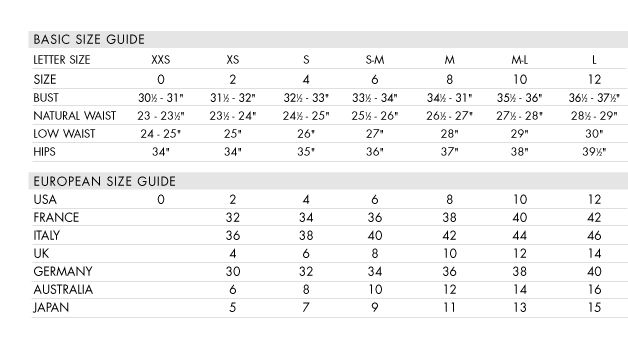

In [27]:
size_dict = {'0':'XXS','1':"XS",'2':'XS','3':'S','4':'S','5':'M','5.5':'M','6':'M','6.5':'M','7':'M','7.5':'M','8':'M','8.5':'M','9':'L','9.5':'L','10':'L','10.5':'L','11':'L','12':'L','13':"XL",'14':"XL",'15':'XL','16':'XL'}|{'24':'XXS','25':"XS",'26':'XS','27':'S','28':'S','29':'M','30':'M','31':'M','32':'M','33':'L','34':'L','35':'L','36':'L','37':"XL",'38':"XL",'39':'XL','40':'XL'}

df['Size'] = df['Size'].replace(size_dict)

In [28]:
df['Size'].value_counts()

M               313
L               279
Not-Clothing    259
XL              160
S               116
               ... 
XXLT              1
7 4E              1
6WW               1
6N                1
12WW              1
Name: Size, Length: 193, dtype: int64

This knocked off about 30 more sizes. Finally, we can see how many of these sizes are unique:

In [29]:
counts = df['Size'].value_counts()
print(f'Of the {len(counts)} sizes in this dataset, {(counts.values == 1).sum()} are sizes which appear once.')

Of the 193 sizes in this dataset, 112 are sizes which appear once.


A possible continuation could be to ignore sizes that have only 1 occurrence, but this wouldn't be wise. If this analysis was solely based on conclusions of size, the idea of ignoring one-off sized items could be valid. However, since there are multiple factors that these one-off sized items can contribute to, such as sale or full price profit margins, they will be preserved. However, later, when analyzing by size, these can be ignored as there is no conclusion to be drawn from them.

Categorical Column: Size

M               313
L               279
Not-Clothing    259
XL              160
S               116
XS               91
XXS              43
XXL              28
12M              11
18M              11
Name: Size, dtype: int64


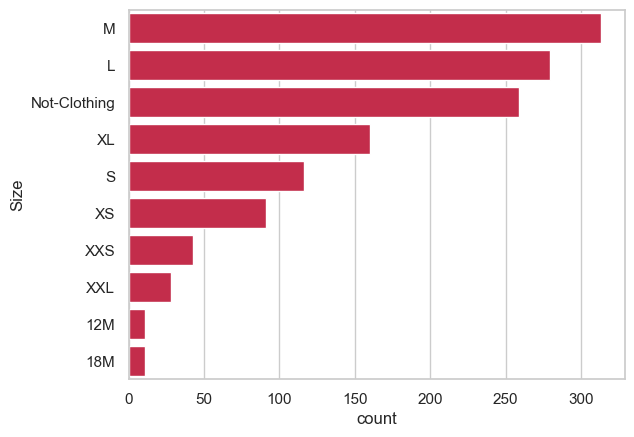

In [30]:
# finally visualize resulting sizes
explore_categorical('Size',df)

# Department Analysis

The most intuitive, initial step to take given this dataset is to group by `Department` to observe inventory-wide trends. The grouping includes the sum of all markdown and non-markdown units and sales.

In [31]:
department_df = df.groupby(['Department']).sum(numeric_only = True)

department_df

,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
Department,,,,,,,,,,,,
Activewear,72010,61922,10088,1256486.85,1122715.00,133771.85,11969,10627,1342,211709.05,194915.75,16793.30
Bath Body Hair,54892,51361,3531,411160.14,381459.62,29700.52,197,188,9,1680.12,1584.12,96.00
Bath Shop/Textiles,5706,4002,1704,122884.78,106941.83,15942.95,612,475,137,8573.58,7581.83,991.75
Bedding,25274,19767,5507,943836.77,725135.09,218701.68,3056,2137,919,121214.09,84701.84,36512.25
Best Brands Casual,28092,23690,4402,960754.61,864800.16,95954.45,3734,3248,486,112352.02,102709.17,9642.85
Casual Wear,17946,16072,1874,285345.78,261240.58,24105.20,2255,2023,232,34973.97,32053.12,2920.85
Children's Accessories,3791,3791,0,55629.09,55629.09,0.00,0,0,0,0.00,0.00,0.00
Contemporary,70083,61607,8476,2467686.27,2251654.32,216031.95,8607,7940,667,322568.05,307569.75,14998.30
Decorative Textiles,36773,26862,9911,1425522.14,1103368.18,322153.96,3734,2709,1025,151184.43,115211.86,35972.57


One thing jumps out - multiple departments have no sales for either full price or markdown units. This is highly unusual compared to the hundreds of thousands of dollars of sales within other departments. Practically, this points to the data for these departments being not entered or otherwise missing, rather than the case of zero sales for each. However, for this Notebook's purpose, they will be omitted. There is nothing to be gathered by analyzing the missing sales data of these departments.

In [32]:
zeros = department_df.loc[department_df['Sales'] == 0].index
department_df.drop(zeros,inplace = True, axis = 0)

Moreover, multiple columns only have a relatively miniscule amount of units sold. It is not productive to equate departments with only a few hundred sales to one with 20,000. For this reason, departments with less than 1000 unit sales will be filtered out. This analysis should be done in its own right, but in this context, it pales in comparison to any conclusions drawn on the exponentially larger categories.

In [33]:
less_units = department_df.loc[department_df['Units Sold'] <= 1000].index
department_df.drop(less_units,inplace = True, axis = 0)

Firstly, there are additional helpful columns that can be introduced. Namely, the percentage of total sales by dollar amount that are markdown can be gathered by dividing markdown sales by the total sales figures. Additionally, the average price per item can be determined for all sales types by dividing the total sales by the total amounts of units sold.

In [34]:
# new cols
department_df['Percentage of Sales are Markdown'] = department_df['Markdown Sales'].div(department_df['Sales'])
department_df['Average Price'] = department_df['Sales'].div(department_df['Units Sold'])
department_df['Full Price Average Price'] = department_df['Full Price Sales'].div(department_df['Full Price Units Sold'])
department_df['Markdown Average Price'] = department_df['Markdown Sales'].div(department_df['Markdown Units Sold'])

Now, we can view in order of departments in which the highest percentage of sales are markdown sales. This can be key in observing problematic current promotional policies.

In [35]:
department_df.sort_values('Percentage of Sales are Markdown',ascending = False).head()

,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales,Percentage of Sales are Markdown,Average Price,Full Price Average Price,Markdown Average Price
Department,,,,,,,,,,,,,,,,
Bedding,25274,19767,5507,943836.77,725135.09,218701.68,3056,2137,919,121214.09,84701.84,36512.25,0.301221,39.664296,39.635863,39.730413
Mens Furnishings,20506,16204,4302,286082.28,241341.03,44741.25,1348,797,551,18244.09,12990.19,5253.90,0.287978,13.534191,16.298858,9.535209
Decorative Textiles,36773,26862,9911,1425522.14,1103368.18,322153.96,3734,2709,1025,151184.43,115211.86,35972.57,0.237938,40.488599,42.529295,35.095190
Junior Sportswear,11228,7840,3388,177184.26,138453.86,38730.40,1171,902,269,18850.84,15687.14,3163.70,0.167828,16.098070,17.391508,11.760967
Junior Drs/Swtr/Jkt,13267,9049,4218,251694.62,211059.17,40635.45,1324,1000,324,24683.18,21223.18,3460.00,0.140176,18.642885,21.223180,10.679012


In [36]:
def observe_depts(department):
    markdown = department_df.loc[department,'Markdown Sales']
    full = department_df.loc[department,'Full Price Sales']
    avg_markdown = department_df.loc[department,'Markdown Average Price']
    avg_full = department_df.loc[department,'Full Price Average Price']
    data = [markdown,full]
    avg_data = [round(avg_markdown,2),round(avg_full,2)]
    plt.subplot(1,2,1)
    plt.title(f'Sales Data Amongst Unit Sales for {department}')
    plt.pie(data,labels = ['Markdown Sales','Full Price Sales'],autopct='%1.2f%%',colors = ['red','cyan'])
    
    plt.subplot(1,2,2)
    plt.title(f'Average Price Data for {department}')
    plt.bar(x =['Avg Markdown Price','Avg Full Price'], height =  avg_data,color = 'red')
    plt.xticks(rotation = 45)
    plt.ylabel('Price ($)')
    plt.tight_layout(pad = 2)
    plt.show()


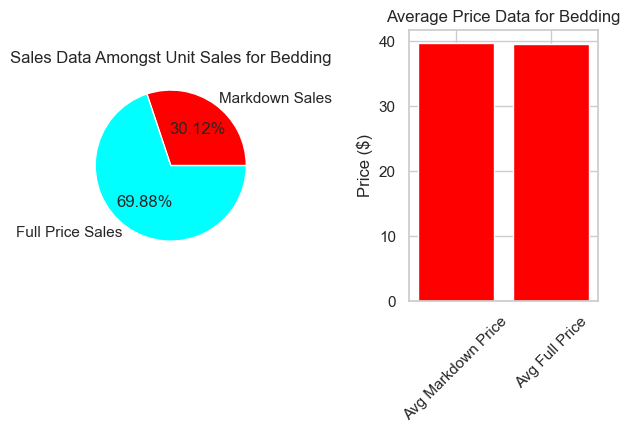

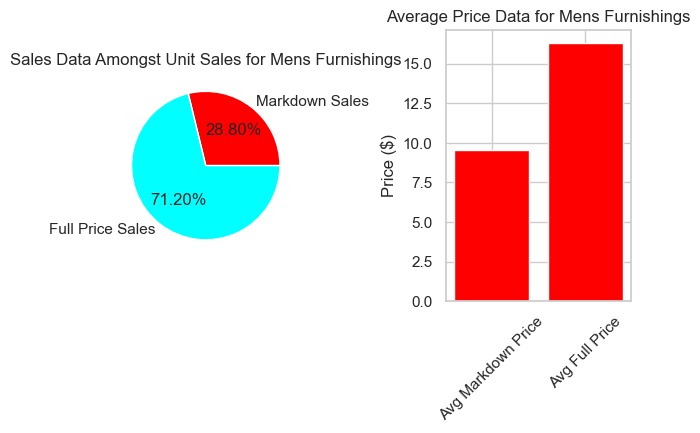

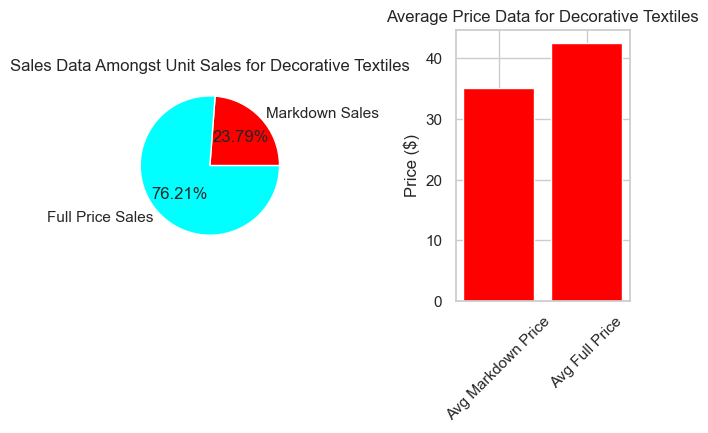

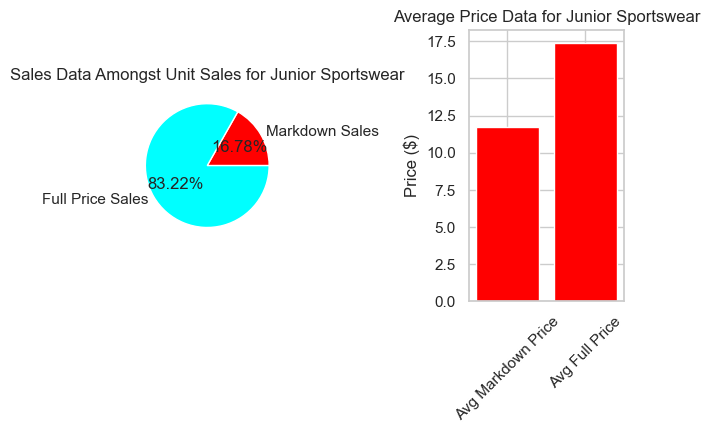

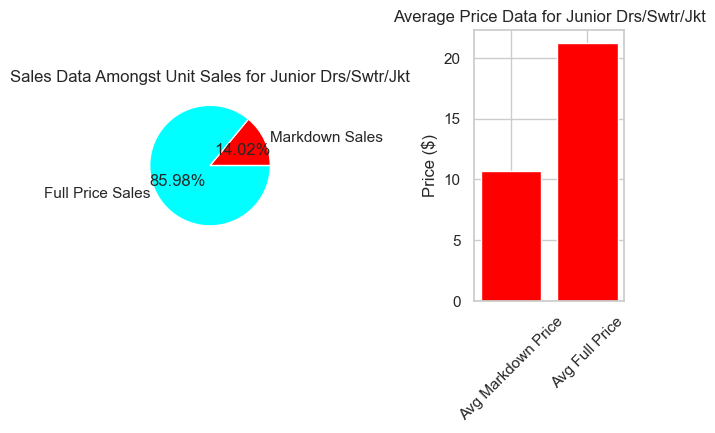

In [37]:
depts = department_df.sort_values('Percentage of Sales are Markdown',ascending = False).head().index
for dept in depts: 
    observe_depts(dept)

Among the departments with the highest markdown sales, two stand out: `Bedding` and `Mens Furnishing`.

In the `Bedding` department, there is a significant rate of sales with markdowns, but the average prices of these items do not differ significantly. This suggests that the current promotional offers in this department are ineffective. It is necessary to offer discounts to drive sales. The high rate of promotional purchases seems to be due to random customer choices rather than targeted deals. Therefore, it is recommended to revise the promotional policies in this department, either by increasing prices of non-discounted items or lowering prices of discounted ones.

In the `Mens Furnishing` department, the situation is the opposite. There is a steep average discount on markdown sales, which likely contributes to the high number of markdown sales. This indicates that customers specifically target these items when they can gain more financially from choosing them. However, given the significant difference in discounts, there is room to increase the average discount rate by a few dollars, which would have a substantial impact on the overall bottom line. There is no need for discounts of more than 50% on certain items.

A similar situation of a large average discount rate can be observed in the `Junior Drs/Swtr/Jkt` department, although the rate of discount purchases is lower. It may raise questions about gender implications (whether men are more or less likely to buy discounted clothing), but that topic goes beyond the scope of this analysis.

This analysis will be performed on the highest grossing departments.

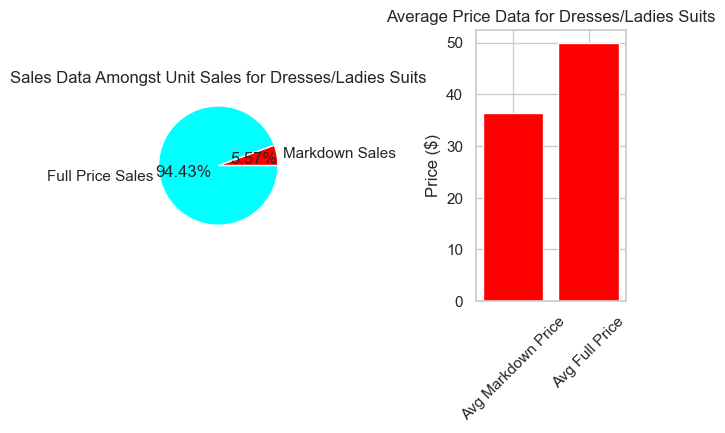

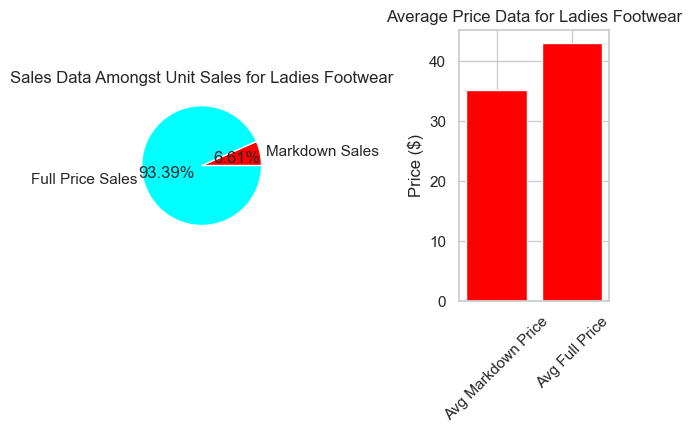

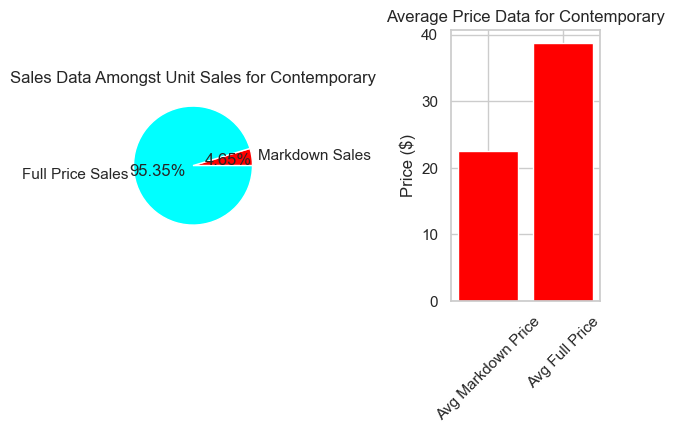

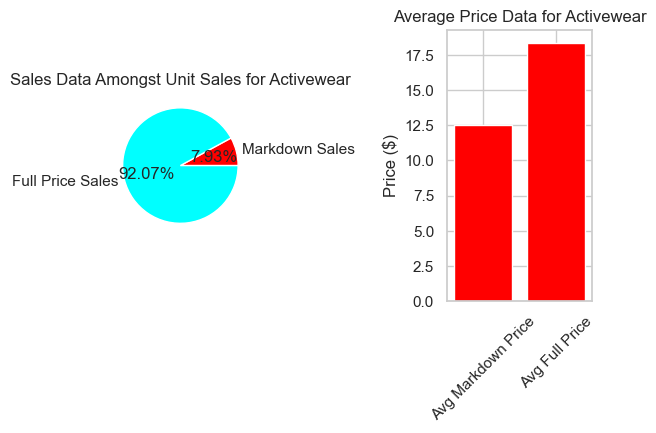

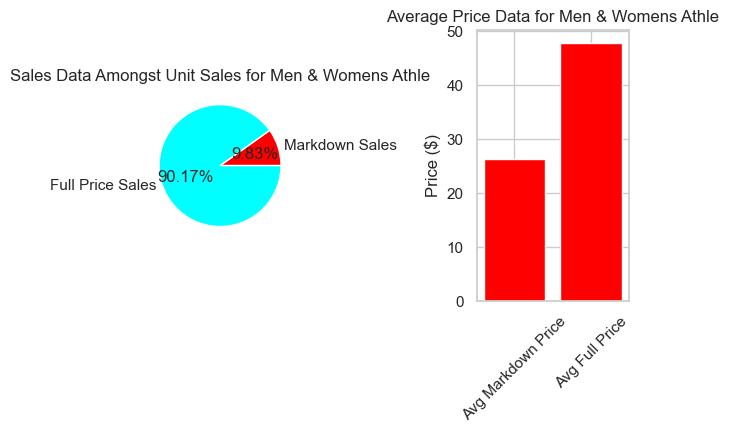

In [38]:
depts = department_df.sort_values('Sales',ascending = False).head().index
for dept in depts: 
    observe_depts(dept)

It becomes clear that the highest grossing departments have a significantly less amount of markdown purchases. This is not coincidence! Rather it highlights the sheer amount of profit lost when there is significant interest customer interest in significant markdown prices. The sole recommendation is for the `Mens & Womens Athle` department to raise the markdown as this nearly 50% discount rate dwarfs its contemporaries.

Overall, it should be expected that any policy changes to these departments will have a proportionally large impact on profit margins.

# Size Analysis

The final analysis will be done on the `Size` column that was modified previously.

In [39]:
# filter by count (i.e. ignore sizes less than 10)
count_size_df = df.groupby(['Size']).agg(['count'])
index = count_size_df[count_size_df['Department','count'] >=50].index

# re combine for sum and search for relevant sizes
size_df = df.groupby(['Size','Department','Class']).sum(numeric_only = True)
size_df = size_df.loc[index]

size_df

Inventory Units  \
Size Department               Class                            
L    Activewear               Bra Tops                   849   
                              Capris                     236   
                              Hoodies                    244   
                              Jackets                    897   
                              One Piece                  571   
...                                                      ...   
XS   Mens Contemporary        SS Knit Tops               117   
     Mens Moderate Sportswear SS Knit Tops                14   
                              SS Woven Tops                2   
     Women's Sizes            Denim                       31   
     Young Mens               SS Knit Tops                19   

                                             Full Price Inventory Units  \
Size Department               Class                                       
L    Activewear               Bra Tops                              812   
                              Capris                                236   
                              Hoodies                               194   
                              Jackets                               806   
                              One Piece                             303   
...                                                                 ...   
XS   Mens Contemporary        SS Knit Tops                          108   
     Mens Moderate Sportswear SS Knit Tops                           14   
                              SS Woven Tops                           2   
     Women's Sizes            Denim                                  20   
     Young Mens               SS Knit Tops                           19   

                                             Markdown Inventory Units  \
Size Department               Class                                     
L    Activewear               Bra Tops                             37   
                              Capris                                0   
                              Hoodies                              50   
                              Jackets                              91   
                              One Piece                           268   
...                                                               ...   
XS   Mens Contemporary        SS Knit Tops                          9   
     Mens Moderate Sportswear SS Knit Tops                          0   
                              SS Woven Tops                         0   
     Women's Sizes            Denim                                11   
     Young Mens               SS Knit Tops                          0   

                                             Inventory Value  \
Size Department               Class                            
L    Activewear               Bra Tops              14409.29   
                              Capris                 3556.05   
                              Hoodies                6038.86   
                              Jackets               21643.94   
                              One Piece             12014.23   
...                                                      ...   
XS   Mens Contemporary        SS Knit Tops           4438.93   
     Mens Moderate Sportswear SS Knit Tops            111.86   
                              SS Woven Tops            32.28   
     Women's Sizes            Denim                  1071.40   
     Young Mens               SS Knit Tops            235.77   

                                             Full Price Inventory Value  \
Size Department               Class                                       
L    Activewear               Bra Tops                         14061.89   
                              Capris                            3556.05   
                              Hoodies                           5245.26   
                              Jackets                          20128.94   
   

To see when a new order needs to be shipped to this particular store, the percentage of inventory remaining from the initial total for each product type will be obtained from dividing $$\frac{inventory}  {sold + inventory}$$ 

For products with availabile inventory less than 60% of the original, this is the red area. More units should be ordered. Also, it is necessary to exclude rarer items that might fulfill this requirement yet are not sought after items.

In [40]:
size_df['Reorder?'] = 'No'

In [41]:
size_df['Available Inventory (%)'] =round(size_df['Inventory Units']/(size_df['Units Sold']+ size_df['Inventory Units'])*100,2)

In [42]:
size_df.loc[(size_df['Available Inventory (%)'] < 60) & (size_df['Units Sold'] > 5),'Reorder?'] = 'Yes'
size_df[size_df['Reorder?'] == 'Yes']

Inventory Units  \
Size         Department          Class                                
L            Activewear          Capris                         236   
             Knitwear            Novelty/Woolblend               22   
Not-Clothing Bath Shop/Textiles  Napkins                         37   
             Seasonal Decorative Everyday Florals                20   
S            Mens Best Brands    Sweaters                        12   
XL           Activewear          Capris                          87   
             Ladies Footwear     Booties                         44   
             Mens Best Brands    SS Woven Tops                   52   

                                                    Full Price Inventory Units  \
Size         Department          Class                                           
L            Activewear          Capris                                    236   
             Knitwear            Novelty/Woolblend                           0   
Not-Clothing Bath Shop/Textiles  Napkins                                     0   
             Seasonal Decorative Everyday Florals                           20   
S            Mens Best Brands    Sweaters                                    0   
XL           Activewear          Capris                                     87   
             Ladies Footwear     Booties                                    20   
             Mens Best Brands    SS Woven Tops                              52   

                                                    Markdown Inventory Units  \
Size         Department          Class                                         
L            Activewear          Capris                                    0   
             Knitwear            Novelty/Woolblend                        22   
Not-Clothing Bath Shop/Textiles  Napkins                                  37   
             Seasonal Decorative Everyday Florals                          0   
S            Mens Best Brands    Sweaters                                 12   
XL           Activewear          Capris                                    0   
             Ladies Footwear     Booties                                  24   
             Mens Best Brands    SS Woven Tops                             0   

                                                    Inventory Value  \
Size         Department          Class                                
L            Activewear          Capris                     3556.05   
             Knitwear            Novelty/Woolblend           220.00   
Not-Clothing Bath Shop/Textiles  Napkins                     183.75   
             Seasonal Decorative Everyday Florals            398.80   
S            Mens Best Brands    Sweaters                    112.50   
XL           Activewear          Capris                     1425.13   
             Ladies Footwear     Booties                    1632.31   
             Mens Best Brands    SS Woven Tops              1115.74   

                                                    Full Price Inventory Value  \
Size         Department          Class                                           
L            Activewear          Capris                                3556.05   
             Knitwear            Novelty/Woolblend                        0.00   
Not-Clothing Bath Shop/Textiles  Napkins                                  0.00   
             Seasonal Decorative Everyday Florals                       398.80   
S            Mens Best Brands    Sweaters                                 0.00   
XL           Activewear          Capris                                1425.13   
             Ladies Footwear     Booties                                942.31   
             Mens Best Brands    SS Woven Tops                         1115.74   

                                                    Markdown Inventory Value  \
Size         Department          Class                                         
L            Activewear    

The index will be reset, and now just simply grouping all sizes. This allows a view of inventory and sales data for each of these sizes. For this analysis, non-clothing items will be ignored, as including obfuscates any conclusions.

In [43]:
size_df = size_df.reset_index().groupby('Size').sum(numeric_only=True)[['Inventory Units','Units Sold','Sales']]
size_df.drop('Not-Clothing',inplace = True, axis = 0)

,Inventory Units,Units Sold,Sales
Size,,,
L,172110,24137,780254.65
M,238660,32545,1164343.32
S,84603,10064,307039.63
XL,64646,12809,444235.89
XS,42680,3955,136932.46


In [72]:
for size in size_df.index:
    print(f"For size {size}, there is {size_df.loc[size,'Inventory Units']} units in inventory and \
{size_df.loc[size,'Units Sold']} units sold -> the ratio of inventory to sold units is \
{round(size_df.loc[size,'Inventory Units']/size_df.loc[size,'Units Sold'],1)}")

For size L, there is 172110 units in inventory and 24137 units sold -> the ratio of inventory to sold units is 7.1
For size M, there is 238660 units in inventory and 32545 units sold -> the ratio of inventory to sold units is 7.3
For size S, there is 84603 units in inventory and 10064 units sold -> the ratio of inventory to sold units is 8.4
For size XL, there is 64646 units in inventory and 12809 units sold -> the ratio of inventory to sold units is 5.0
For size XS, there is 42680 units in inventory and 3955 units sold -> the ratio of inventory to sold units is 10.8


Even independent of any sales figures, this analysis clearly signifies too many XS (and to a lesser degree S) units in inventory relative to the other sizes. Ideally these ratios would be nearly identical. If anything, there is more reason to have a higher stocked-sold ratio for sizes that are in more demand as product turnover would be higher. A clear policy recommendation to mitigate the overstocking of these smaller sizes and to ensure a proper flow of product in and out. This can be done in a variety of ways, from promotions to optimal placement in stores.

In fact, this overstocking issue appears to be more egrigeous when looking to relevant sales figures:

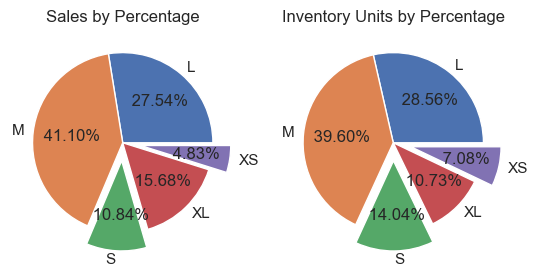

In [101]:
pies = ['Sales', 'Inventory Units']
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.pie(x = size_df[pies[i-1]],autopct =' %1.2f%%',labels = size_df.index,    explode = (0, 0, 0.2, 0,.2) )
    plt.title(f'{pies[i-1]} by Percentage')
plt.show()


Predictibly, the overstocking issue has resulted in an improportional relationship between sales and inventory amongst the various sizes. In fact, as the size increases, 